In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/wesad-main')

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
from ae_feature_extractor import autoencoder
ae = autoencoder ()

## Chest and Wrist Physio modalities classification

In [8]:
# use chest and wrist features for classification
scores_all = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso" + str(sid) + ".pkl"))

    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)

    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)

    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([sid, acc, precision, recall, f1])
    cms.append(cm)

subject  2
accuracy:  0.7166430928807166
f1 score:  0.7325100729314475

subject  3
accuracy:  0.8310120705663882
f1 score:  0.8337796447241307

subject  4
accuracy:  0.7889145496535797
f1 score:  0.7465738119541598

subject  5
accuracy:  0.94361750112765
f1 score:  0.9435641692622806

subject  6
accuracy:  0.9137148047229791
f1 score:  0.9143376394568512

subject  7
accuracy:  0.767515923566879
f1 score:  0.7268040589496064

subject  8
accuracy:  0.6268115942028986
f1 score:  0.6225286897024884

subject  9
accuracy:  0.8302230314064634
f1 score:  0.7942358750305635

subject  10
accuracy:  0.7773386034255599
f1 score:  0.7344064052021332

subject  11
accuracy:  0.9232150875617423
f1 score:  0.9227764229186627

subject  13
accuracy:  0.7955974842767296
f1 score:  0.7531151829496433

subject  14
accuracy:  0.4566681634485855
f1 score:  0.5050275126102457

subject  15
accuracy:  0.7702642185400806
f1 score:  0.7315696378352837

subject  16
accuracy:  0.9828905898244035
f1 score:  0.9829012

In [9]:
np.array(scores_all)[:,1].mean() #accuracy

np.float64(0.7793554541243642)

In [10]:
np.array(scores_all)[:,1].std()

np.float64(0.1390168339735052)

In [11]:
np.array(scores_all)[:,2].mean() #precision

np.float64(0.7774323220335867)

In [12]:
np.array(scores_all)[:,2].std()

np.float64(0.12317607448544644)

In [13]:
np.array(scores_all)[:,3].mean() #recall

np.float64(0.7793554541243642)

In [14]:
np.array(scores_all)[:,3].std()

np.float64(0.1390168339735052)

In [15]:
np.array(scores_all)[:,4].mean() #f1-score

np.float64(0.7653934583845547)

In [16]:
np.array(scores_all)[:,4].std()

np.float64(0.1359326188233914)

### Confusion Matrices per subject and for all subjects combined

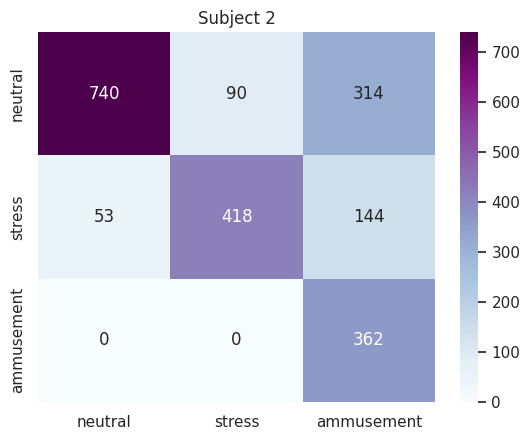

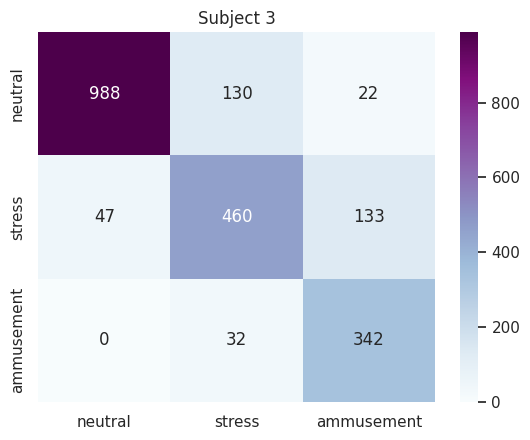

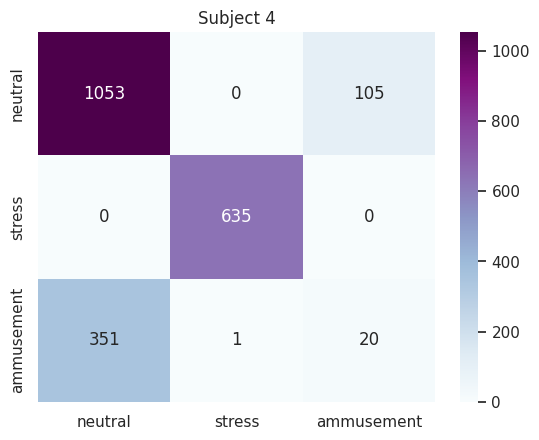

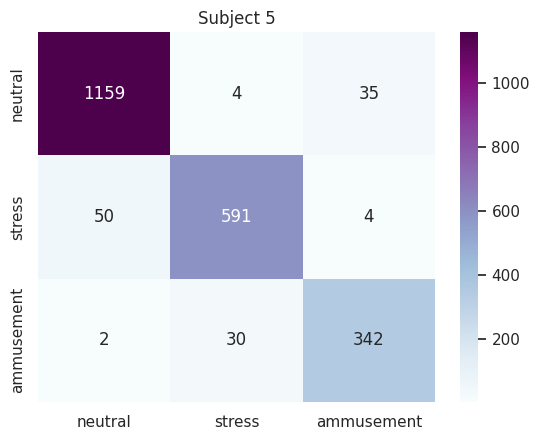

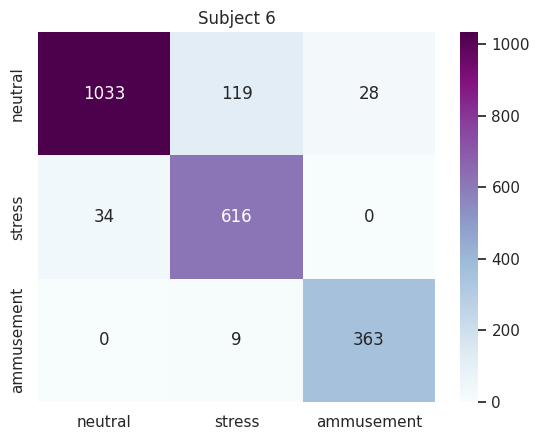

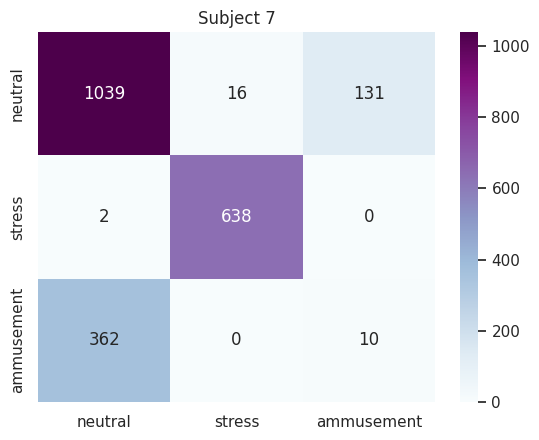

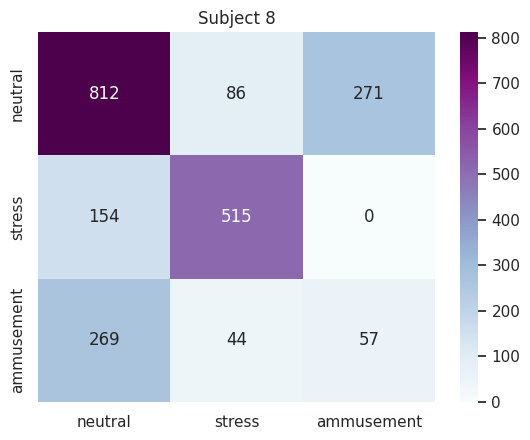

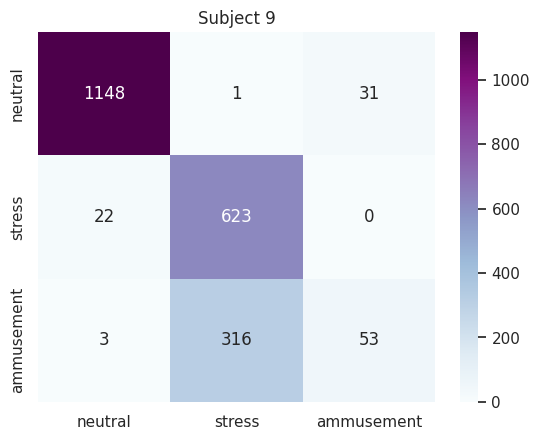

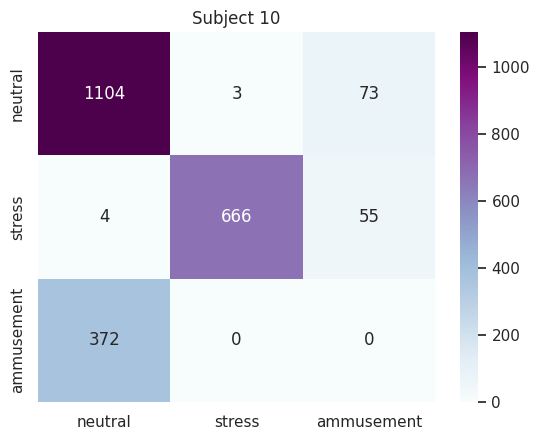

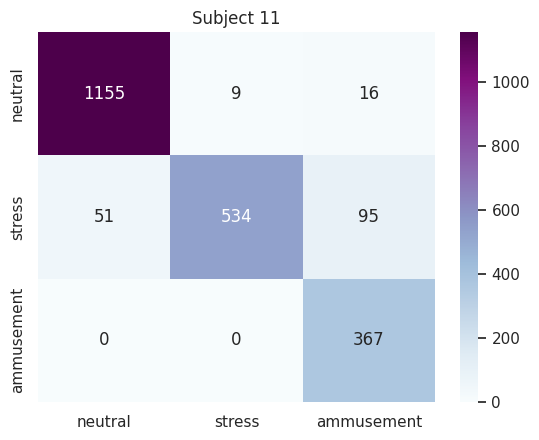

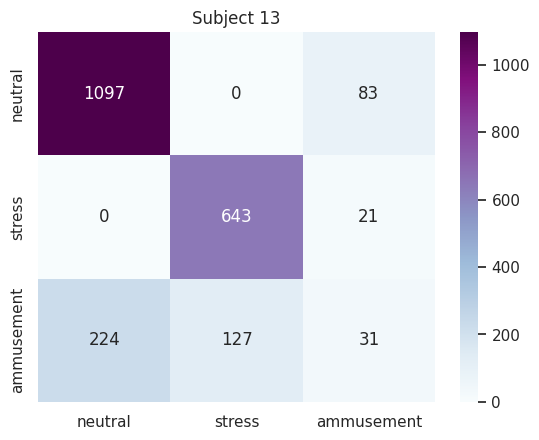

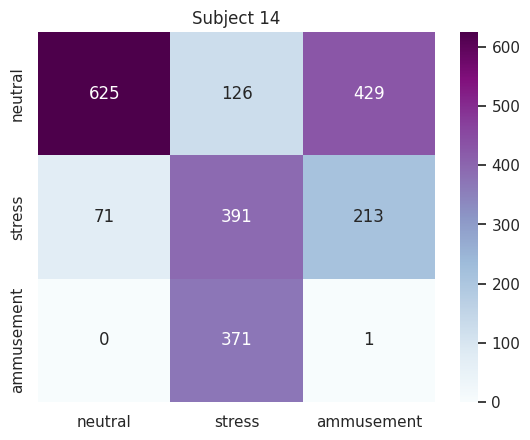

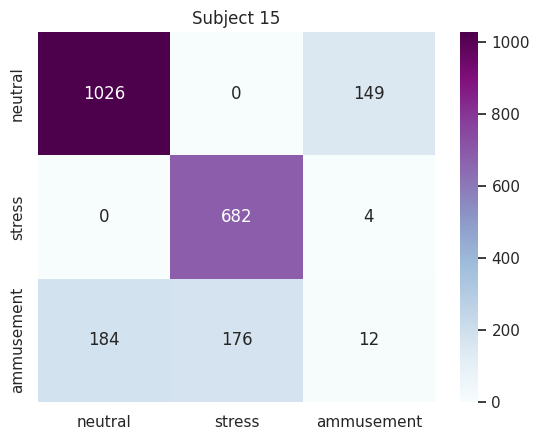

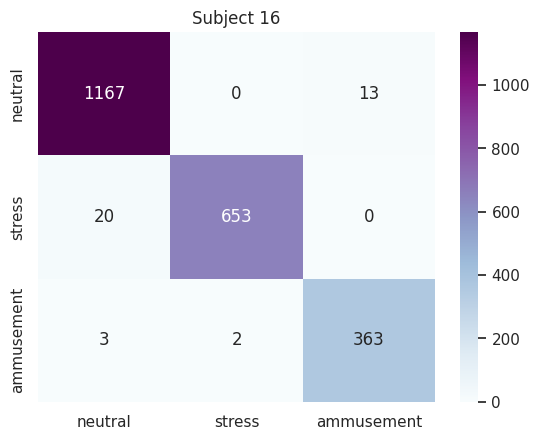

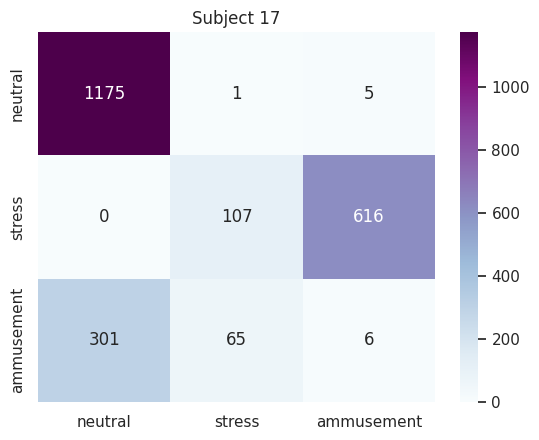

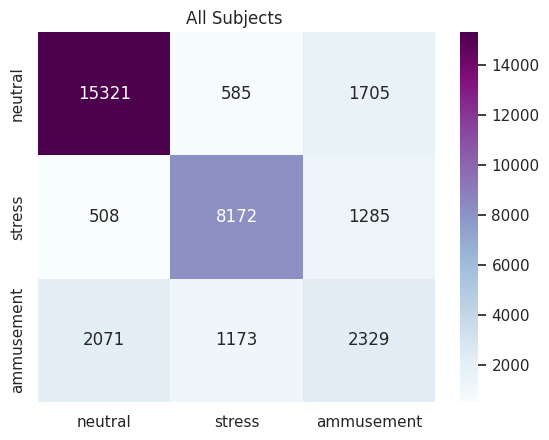

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [18]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso" + str(sid) + ".pkl"))

    y = feat[:,-1]
    x = feat[:,:80]
    x = StandardScaler().fit_transform(x)

    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]
    x_test = StandardScaler().fit_transform(x_test)

    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_c.append([sid, acc, precision, recall, f1])
    cms.append(cm)

subject  2
accuracy:  0.6671381423856672
f1 score:  0.671467920024332

subject  3
accuracy:  0.7256267409470752
f1 score:  0.7194884119892202

subject  4
accuracy:  0.763972286374134
f1 score:  0.7573917740233242

subject  5
accuracy:  0.7803337843933243
f1 score:  0.7683957029126195

subject  6
accuracy:  0.7679382379654859
f1 score:  0.744706766164564

subject  7
accuracy:  0.77024567788899
f1 score:  0.7747366162303623

subject  8
accuracy:  0.5262681159420289
f1 score:  0.5157144593540101

subject  9
accuracy:  0.8903049613108784
f1 score:  0.8788717616897466

subject  10
accuracy:  0.8111550285463329
f1 score:  0.7567221241653903

subject  11
accuracy:  0.9402784014369107
f1 score:  0.9405277511521788

subject  13
accuracy:  0.816711590296496
f1 score:  0.7656871822113857

subject  14
accuracy:  0.7642568477772789
f1 score:  0.7521666016508142

subject  15
accuracy:  0.8163905060456784
f1 score:  0.7853467338659186

subject  16
accuracy:  0.9477712742008104
f1 score:  0.9479011521

In [19]:
np.array(scores_c)[:,1].mean() #accuracy

np.float64(0.7909660009192515)

In [20]:
np.array(scores_c)[:,1].std()

np.float64(0.10259853891295385)

In [21]:
np.array(scores_c)[:,2].mean() #precision

np.float64(0.7813032014198696)

In [22]:
np.array(scores_c)[:,2].std()

np.float64(0.10236064327593858)

In [23]:
np.array(scores_c)[:,3].mean() #recall

np.float64(0.7909660009192515)

In [24]:
np.array(scores_c)[:,3].std()

np.float64(0.10259853891295385)

In [ ]:
np.array(scores_c)[:,4].mean() #f1-score

np.float64(0.7700598001844191)

In [25]:
np.array(scores_c)[:,4].std()

np.float64(0.10311204055352129)

### Confusion Matrices per subject and for all subjects combined

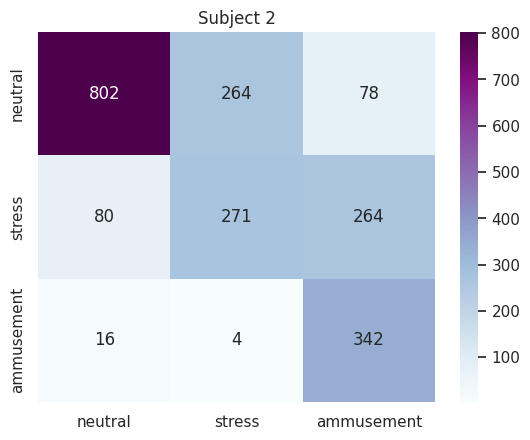

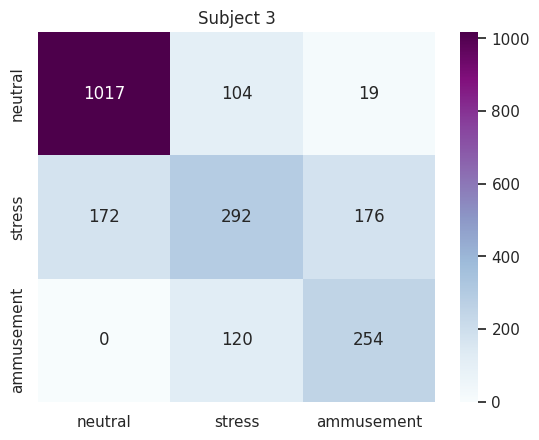

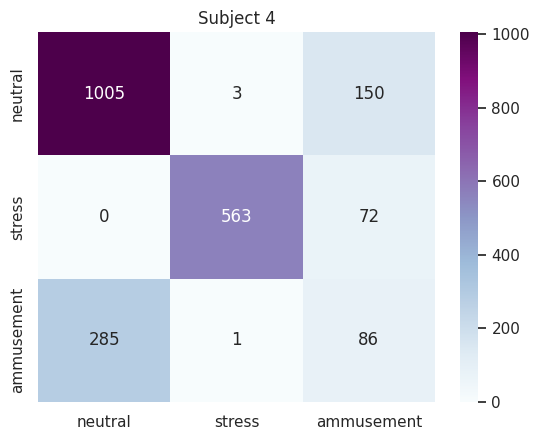

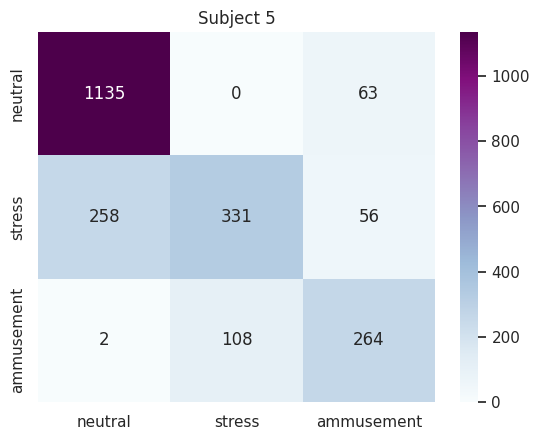

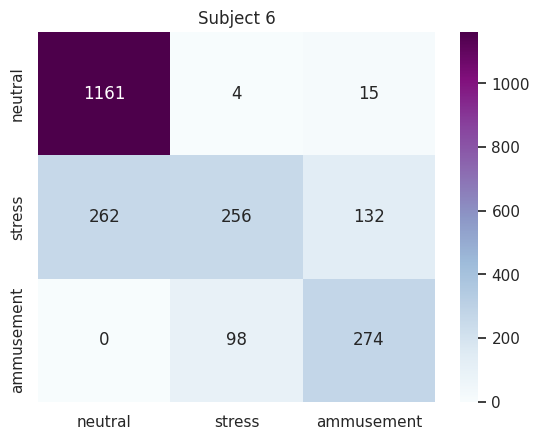

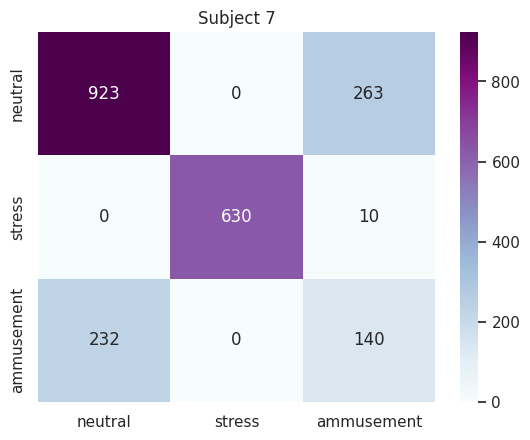

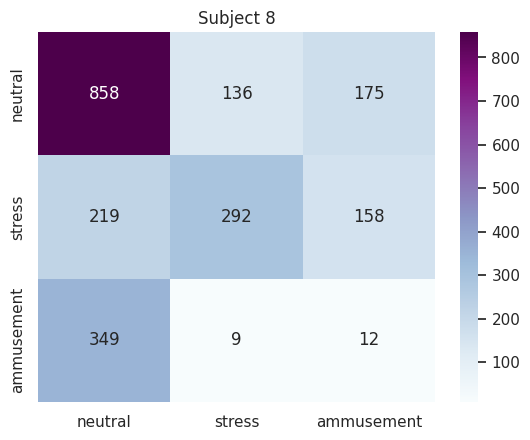

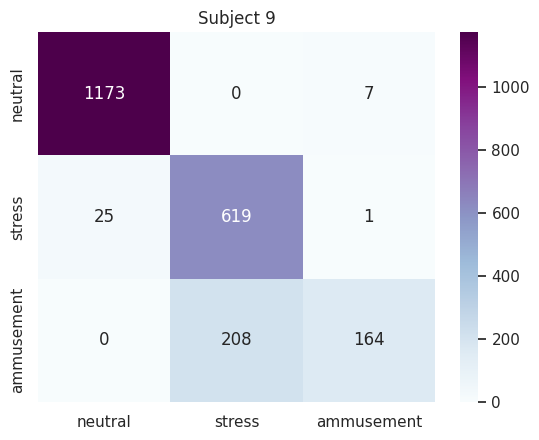

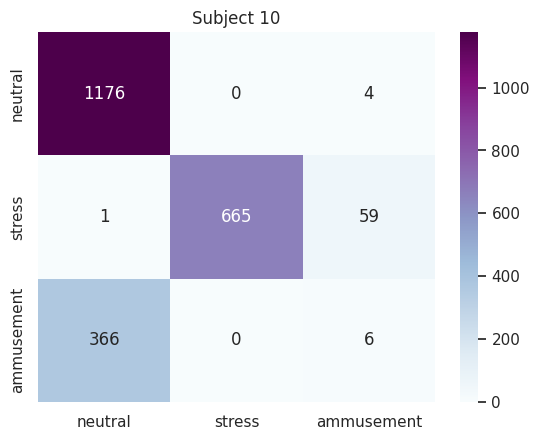

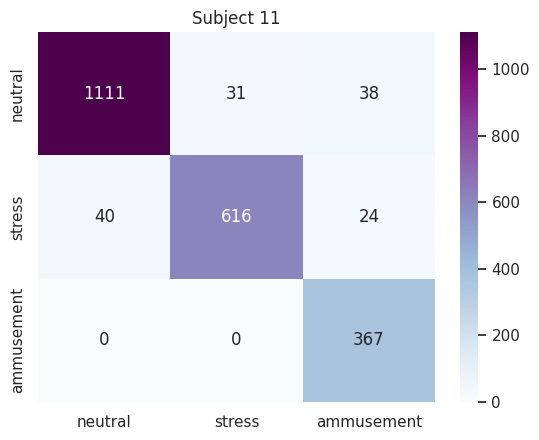

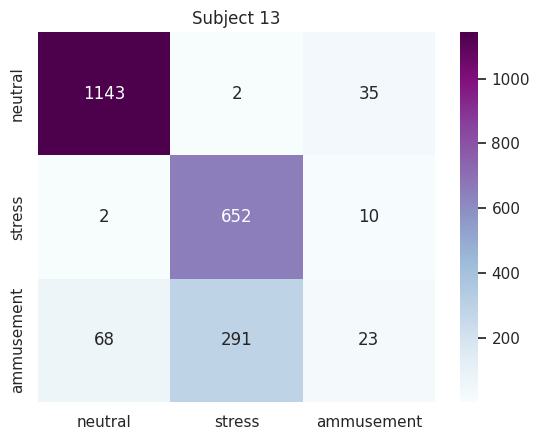

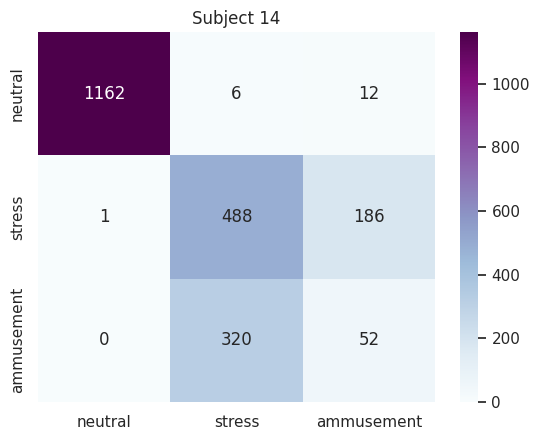

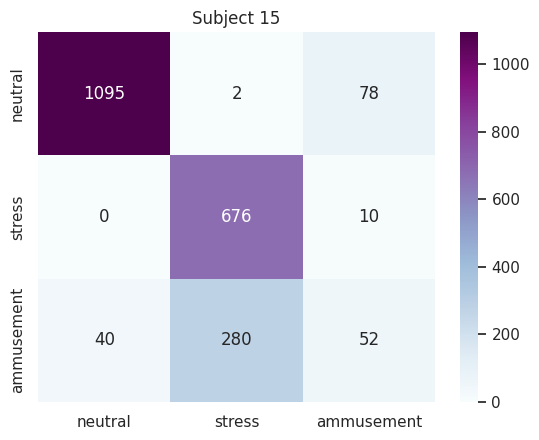

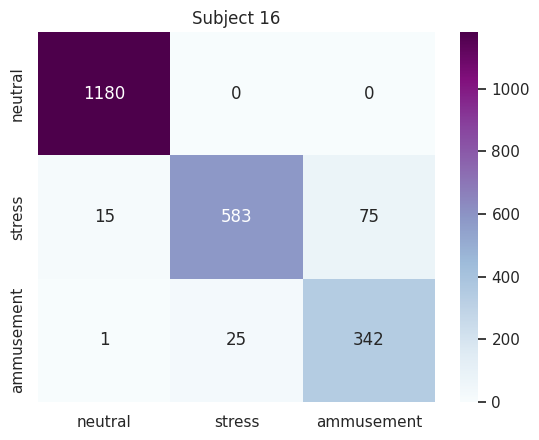

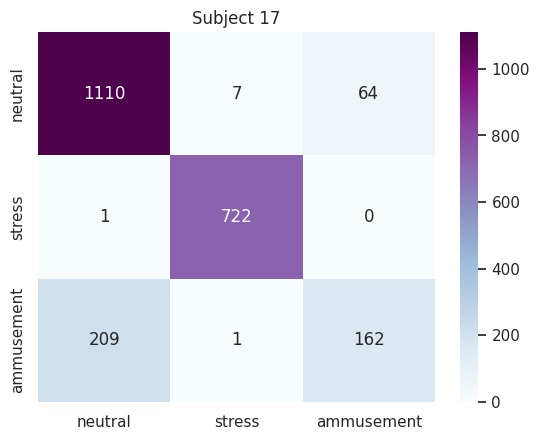

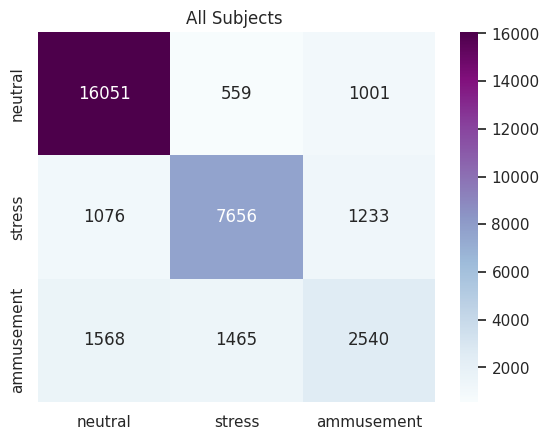

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [27]:
# use wrist only features for classification
scores_w = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso" + str(sid) + ".pkl"))

    y = feat[:,-1]
    x = feat[:,80:-1]
    x = StandardScaler().fit_transform(x)

    y_test = feat_test[:,-1]
    x_test = feat_test[:,80:-1]
    x_test = StandardScaler().fit_transform(x_test)

    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_w.append([sid, acc, precision, recall, f1])
    cms.append(cm)

subject  2
accuracy:  0.7718057520037718
f1 score:  0.7412685075974564

subject  3
accuracy:  0.5584958217270195
f1 score:  0.5355511316771883

subject  4
accuracy:  0.8226327944572748
f1 score:  0.7575932761148362

subject  5
accuracy:  0.7681551646368967
f1 score:  0.7441203713679879

subject  6
accuracy:  0.821071752951862
f1 score:  0.8237020158293653

subject  7
accuracy:  0.7643312101910829
f1 score:  0.712179442149771

subject  8
accuracy:  0.7934782608695652
f1 score:  0.7259164179882275

subject  9
accuracy:  0.8511606736458808
f1 score:  0.8499503150559189

subject  10
accuracy:  0.6258234519104084
f1 score:  0.6354151026575738

subject  11
accuracy:  0.738212842388864
f1 score:  0.7261332343067152

subject  13
accuracy:  0.7466307277628033
f1 score:  0.7084279358687152

subject  14
accuracy:  0.38302649303996406
f1 score:  0.38444238592302477

subject  15
accuracy:  0.6345723242274967
f1 score:  0.6302223643018835

subject  16
accuracy:  0.8784331382260243
f1 score:  0.87746

In [28]:
np.array(scores_w)[:,1].mean() #accuracy

np.float64(0.6996843001961501)

In [29]:
np.array(scores_w)[:,1].std()

np.float64(0.15757088401219865)

In [30]:
np.array(scores_w)[:,2].mean() #precision

np.float64(0.6740503103494969)

In [31]:
np.array(scores_w)[:,2].std()

np.float64(0.14465267048531505)

In [32]:
np.array(scores_w)[:,3].mean() #recall

np.float64(0.6996843001961501)

In [33]:
np.array(scores_w)[:,3].std()

np.float64(0.15757088401219865)

In [34]:
np.array(scores_w)[:,4].mean() #f1-score

np.float64(0.6804205479075802)

In [35]:
np.array(scores_w)[:,4].std()

np.float64(0.14776257605311807)

### Confusion Matrices per subject and for all subjects combined

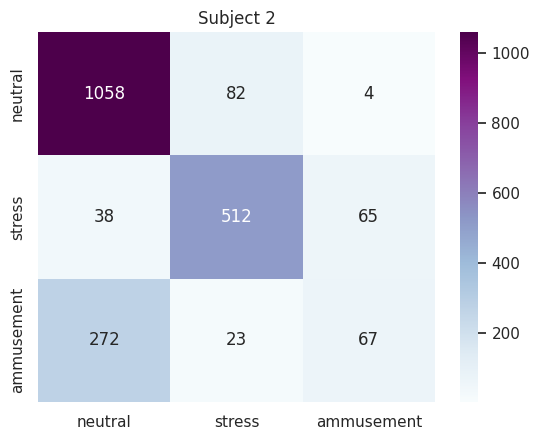

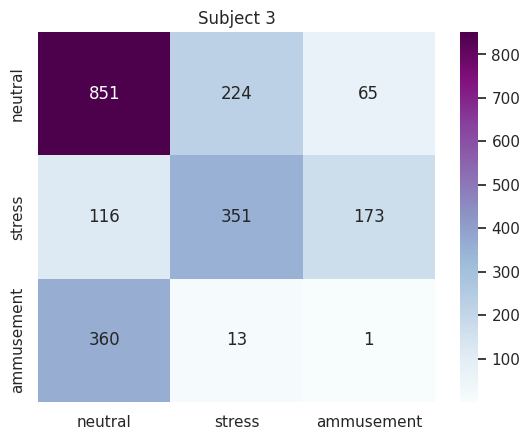

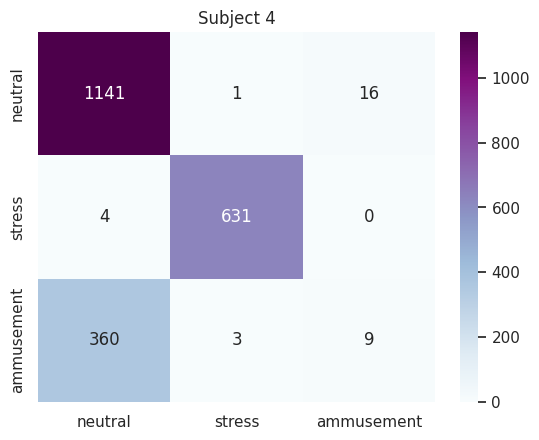

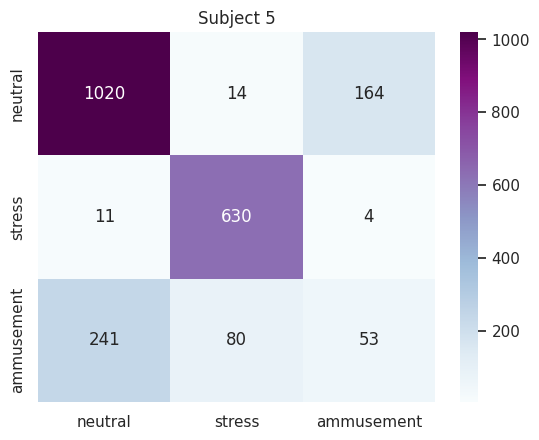

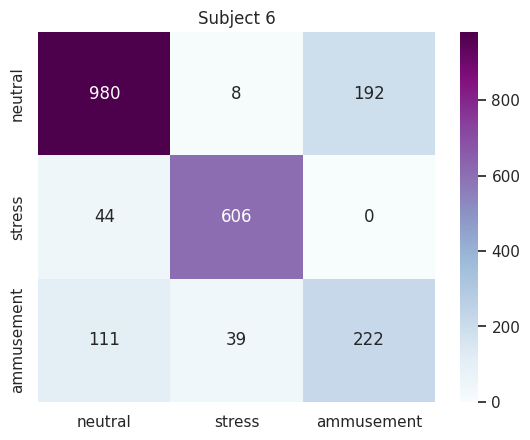

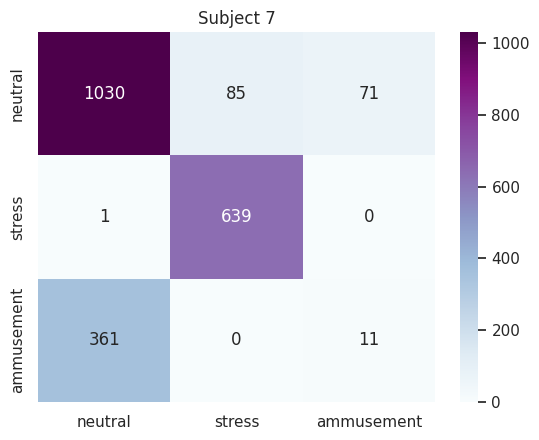

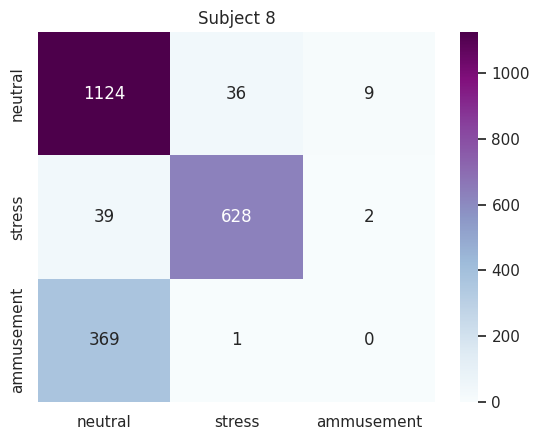

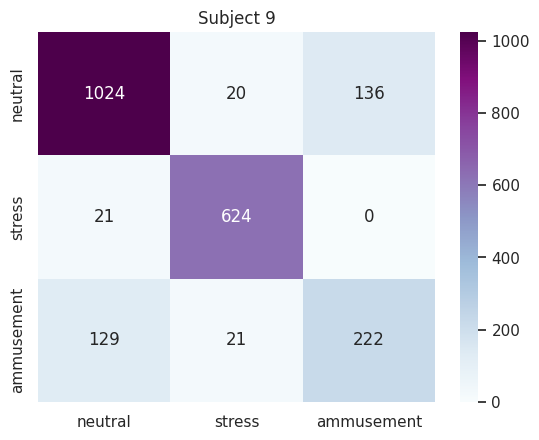

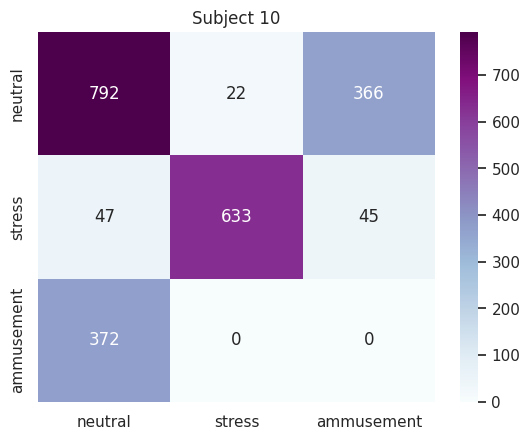

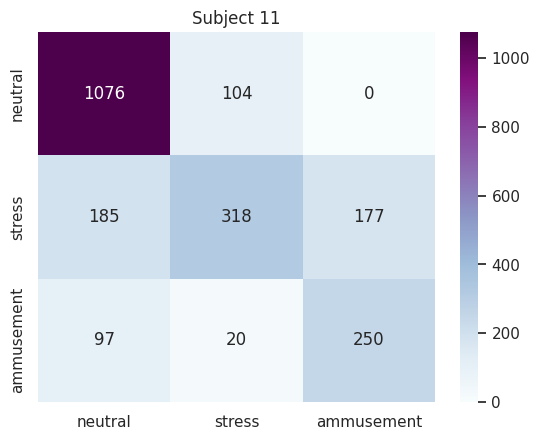

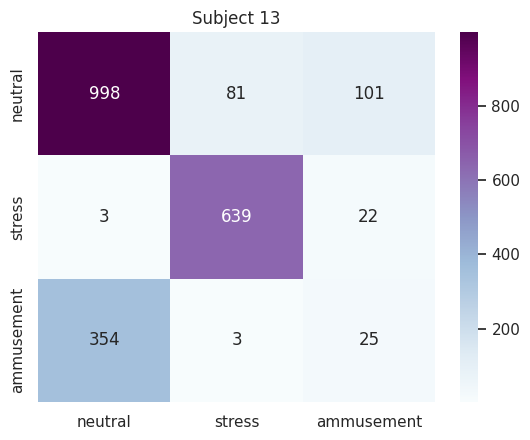

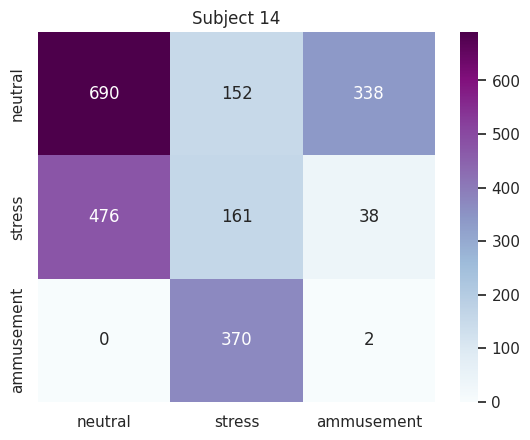

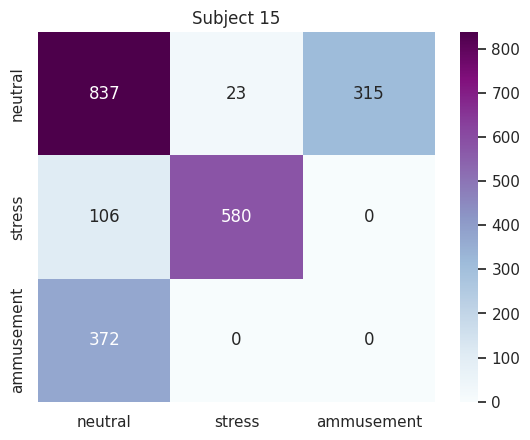

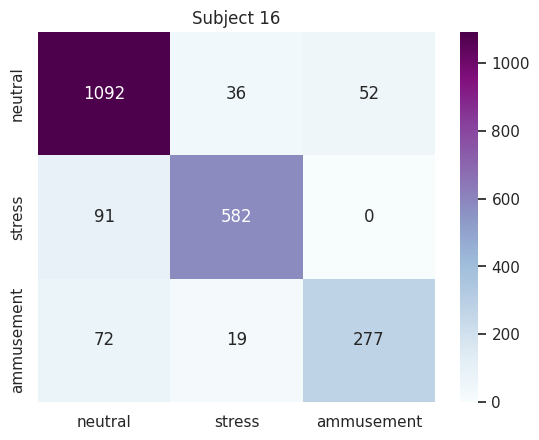

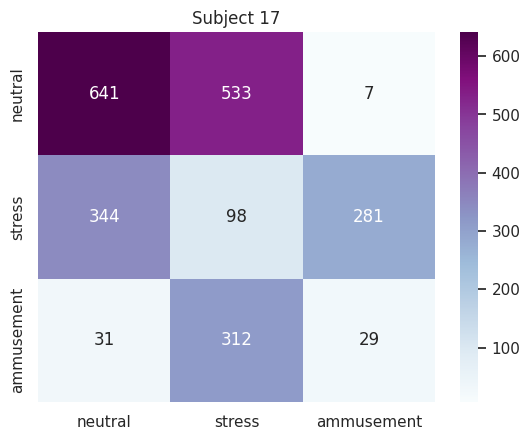

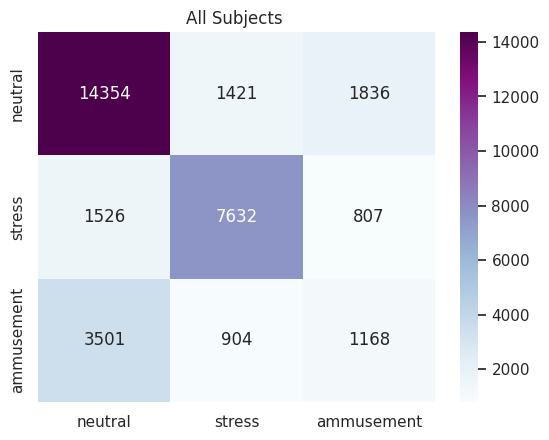

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

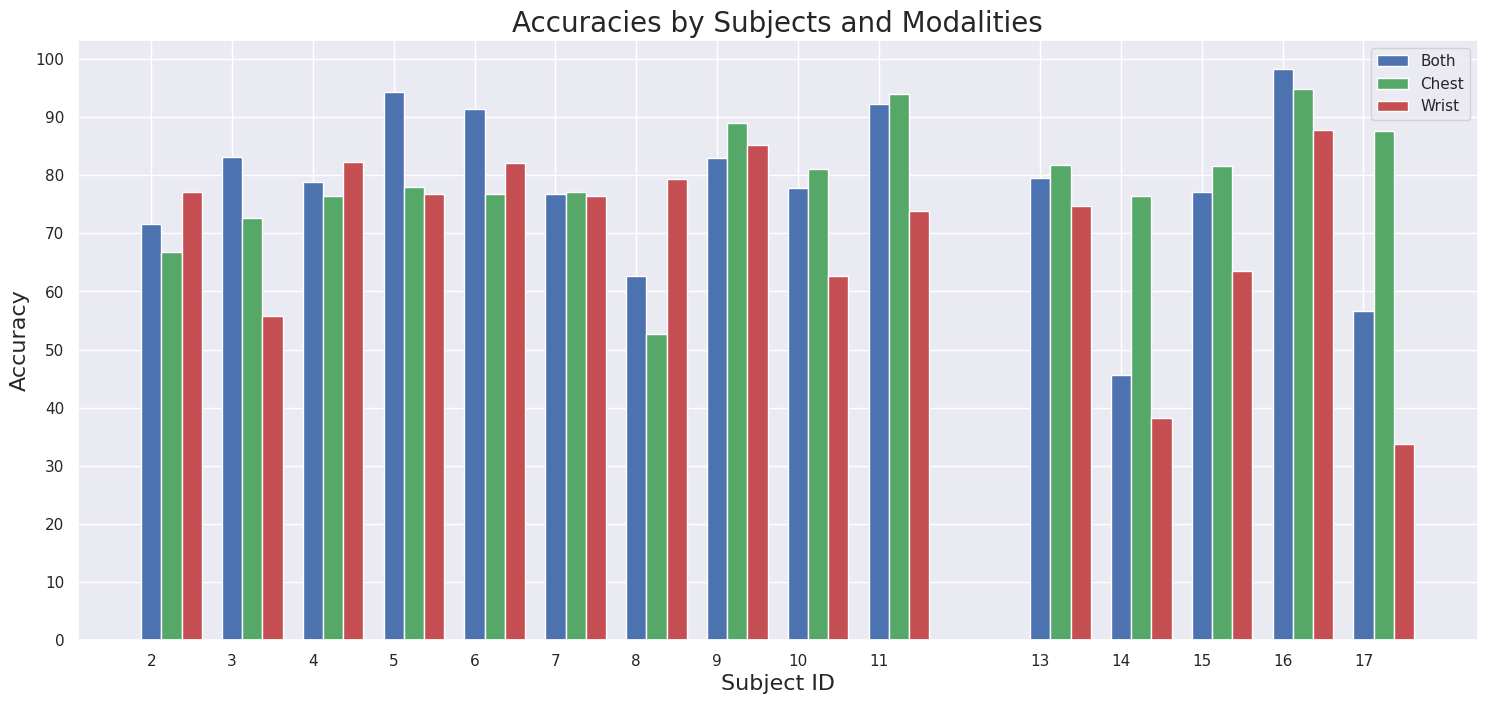

In [37]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

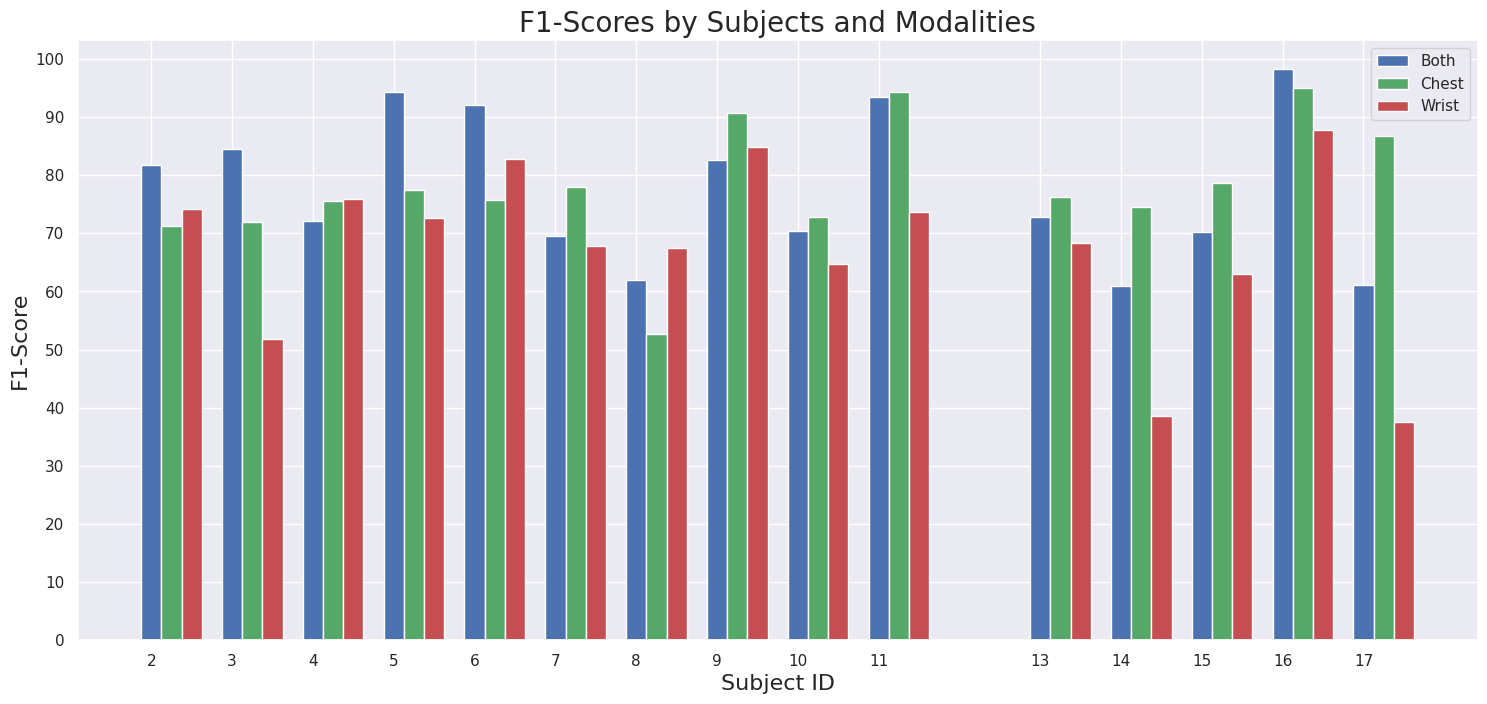

In [38]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])